In [ ]:
import numpy as np
import pandas as pd
import os
import cv2
import matplotlib.pyplot as plt
from skimage.transform import resize
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install -q git+https://github.com/huggingface/transformers

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.5/224.5 kB 6.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 80.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 49.3 MB/s eta 0:00:00


In [ ]:
!unzip /content/drive/MyDrive/Dissertation_Project.zip

Streaming output truncated to the last 5000 lines.
  inflating: Dissertation_Project/CONTROL/CONTROLAD_2061.png  
  inflating: Dissertation_Project/CONTROL/CONTROLAD_2063.png  
  inflating: Dissertation_Project/CONTROL/CONTROLAD_2064.png  
  inflating: Dissertation_Project/CONTROL/CONTROLAD_2067.png  
  inflating: Dissertation_Project/CONTROL/CONTROLAD_2069.png  
  inflating: Dissertation_Project/CONTROL/CONTROLAD_2070.png  
  inflating: Dissertation_Project/CONTROL/CONTROLAD_2072.png  
  inflating: Dissertation_Project/CONTROL/CONTROLAD_2078.png  
  inflating: Dissertation_Project/CONTROL/CONTROLAD_208.png  
  inflating: Dissertation_Project/CONTROL/CONTROLAD_2083.png  
  inflating: Dissertation_Project/CONTROL/CONTROLAD_2094.png  
  inflating: Dissertation_Project/CONTROL/CONTROLAD_2095.png  
  inflating: Dissertation_Project/CONTROL/CONTROLAD_2096.png  
  inflating: Dissertation_Project/CONTROL/CONTROLAD_2098.png  
  inflating: Dissertation_Project/CONTROL/CONTROLAD_21.png  
  infla

In [ ]:
path_to_folder  = "/content/Dissertation_Project"
pd_img = os.listdir(path= path_to_folder+'/PD/')
control_img = os.listdir(path= path_to_folder+'/CONTROL/')
glioma_img = os.listdir(path= path_to_folder+'/GLIOMA/')
meningioma_img = os.listdir(path= path_to_folder+'/MENINGIOMA/')
ad_img = os.listdir(path= path_to_folder+'/AD/')
pituitary_img = os.listdir(path= path_to_folder+'/PITUITARY/')

In [ ]:
classes = {'PD':1, 'CONTROL':0, 'AD':2, 'GLIOMA':3,
          'MENINGIOMA':4, 'PITUITARY':5}
X= []
Y= []
for i in classes:
    path = '/content/Dissertation_Project/'+ i
    for j in os.listdir(path):
        img = cv2.imread(path+'/'+j, 0)
        img = cv2.resize(img, (256,256),interpolation= cv2.INTER_CUBIC)
        img= cv2.cvtColor(img,cv2.COLOR_GRAY2RGB)

        # img = img / 8952 # Normalization using total no. of images is 253
        X.append(img)
        Y.append(classes[i])

(256, 256, 3)


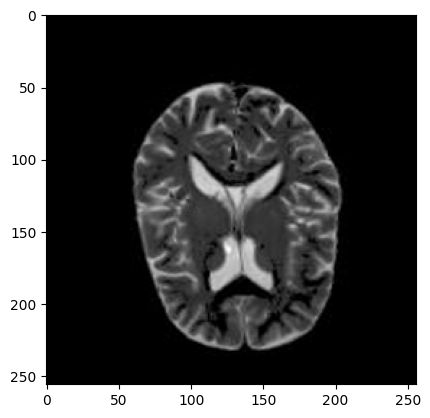

In [ ]:
import matplotlib.pyplot as plt

plt.imshow(X[1])
print(X[1].shape)

In [ ]:
x = np.array(X)
y = np.array(Y)
x.shape, y.shape

((8952, 256, 256, 3), (8952,))

In [ ]:
from sklearn.model_selection import train_test_split
from tensorflow import keras
from tensorflow.keras import layers, models
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from tensorflow.keras.models import Model
from tensorflow.keras.applications import resnet50



In [ ]:
resnet=resnet50.ResNet50(weights='imagenet', include_top=False, input_shape=(256,256,3))
resnet.summary()

94765736/94765736 [==============================] - 0s 0us/step
Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 256, 256, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 262, 262, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 128, 128, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                          

Test set 1

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((7161, 256, 256, 3), (7161,), (1791, 256, 256, 3), (1791,))

In [ ]:
X_train = x_train.reshape(-1, 256, 256, 3)
X_test = x_test.reshape(-1, 256, 256, 3)
X_train.shape, X_test.shape

((7161, 256, 256, 3), (1791, 256, 256, 3))

In [ ]:

Y_train = to_categorical(y_train)
Y_test = to_categorical(y_test)

Y_train.shape, Y_test.shape


((7161, 6), (1791, 6))

In [ ]:
resnet=resnet50.ResNet50(weights='imagenet', include_top=False, input_shape=(256,256,3))
resnet.summary()

94765736/94765736 [==============================] - 0s 0us/step
Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 256, 256, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 262, 262, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 128, 128, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                          

In [ ]:
for layer in resnet.layers:
    layer.trainable=False

In [ ]:
x = keras.layers.Flatten()(resnet.output)
x = keras.layers.Dense(32,activation='relu')(x)
x = keras.layers.Dense(64,activation='relu')(x)
x = keras.layers.Dense(128,activation='relu')(x)


prediction = keras.layers.Dense(6,activation='softmax')(x)
resnet_model = Model(inputs= resnet.input, outputs=prediction)
resnet_model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 256, 256, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 262, 262, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 128, 128, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                              

In [ ]:
resnet_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
resnet_history= resnet_model.fit(X_train, Y_train, epochs = 30)

Epoch 1/30
224/224 [==============================] - 39s 113ms/step - loss: 0.8176 - accuracy: 0.6826
Epoch 2/30
224/224 [==============================] - 25s 110ms/step - loss: 0.4562 - accuracy: 0.8074
Epoch 3/30
224/224 [==============================] - 25s 112ms/step - loss: 0.3575 - accuracy: 0.8507
Epoch 4/30
224/224 [==============================] - 25s 112ms/step - loss: 0.1950 - accuracy: 0.9221
Epoch 5/30
224/224 [==============================] - 25s 111ms/step - loss: 0.1975 - accuracy: 0.9337
Epoch 6/30
224/224 [==============================] - 25s 111ms/step - loss: 0.2396 - accuracy: 0.9278
Epoch 7/30
224/224 [==============================] - 25s 113ms/step - loss: 0.1366 - accuracy: 0.9573
Epoch 8/30
224/224 [==============================] - 25s 112ms/step - loss: 0.1149 - accuracy: 0.9596
Epoch 9/30
224/224 [==============================] - 25s 111ms/step - loss: 0.0906 - accuracy: 0.9742
Epoch 10/30
224/224 [==============================] - 25s 111ms/step - l

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=20)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((7161, 256, 256, 3), (7161,), (1791, 256, 256, 3), (1791,))

In [ ]:
X_train = x_train.reshape(-1, 256, 256, 3)
X_test = x_test.reshape(-1, 256, 256, 3)
X_train.shape, X_test.shape

((7161, 256, 256, 3), (1791, 256, 256, 3))

In [ ]:
resnet_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
resnet_history2= resnet_model.fit(X_train, Y_train, epochs = 30)

Epoch 1/30
224/224 [==============================] - 40s 113ms/step - loss: 0.9124 - accuracy: 0.6799
Epoch 2/30
224/224 [==============================] - 25s 112ms/step - loss: 0.4597 - accuracy: 0.8151
Epoch 3/30
224/224 [==============================] - 26s 117ms/step - loss: 0.2995 - accuracy: 0.8800
Epoch 4/30
224/224 [==============================] - 26s 117ms/step - loss: 0.1845 - accuracy: 0.9330
Epoch 5/30
224/224 [==============================] - 26s 114ms/step - loss: 0.1230 - accuracy: 0.9546
Epoch 6/30
224/224 [==============================] - 26s 115ms/step - loss: 0.1335 - accuracy: 0.9550
Epoch 7/30
224/224 [==============================] - 26s 116ms/step - loss: 0.0878 - accuracy: 0.9680
Epoch 8/30
224/224 [==============================] - 26s 115ms/step - loss: 0.0777 - accuracy: 0.9768
Epoch 9/30
224/224 [==============================] - 26s 116ms/step - loss: 0.0456 - accuracy: 0.9830
Epoch 10/30
224/224 [==============================] - 26s 116ms/step - l

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=60)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((7161, 256, 256, 3), (7161,), (1791, 256, 256, 3), (1791,))

In [ ]:
X_train = x_train.reshape(-1, 256, 256, 3)
X_test = x_test.reshape(-1, 256, 256, 3)
X_train.shape, X_test.shape

((7161, 256, 256, 3), (1791, 256, 256, 3))

In [ ]:

Y_train = to_categorical(y_train)
Y_test = to_categorical(y_test)

Y_train.shape, Y_test.shape


((7161, 6), (1791, 6))

In [ ]:
resnet_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
resnet_history3= resnet_model.fit(X_train, Y_train, epochs = 30)

Epoch 1/30
224/224 [==============================] - 32s 120ms/step - loss: 0.1392 - accuracy: 0.9705
Epoch 2/30
224/224 [==============================] - 26s 115ms/step - loss: 0.0569 - accuracy: 0.9851
Epoch 3/30
224/224 [==============================] - 26s 114ms/step - loss: 0.0342 - accuracy: 0.9899
Epoch 4/30
224/224 [==============================] - 26s 117ms/step - loss: 0.0459 - accuracy: 0.9870
Epoch 5/30
224/224 [==============================] - 26s 117ms/step - loss: 0.0613 - accuracy: 0.9802
Epoch 6/30
224/224 [==============================] - 26s 115ms/step - loss: 0.0434 - accuracy: 0.9872
Epoch 7/30
224/224 [==============================] - 26s 116ms/step - loss: 0.0264 - accuracy: 0.9927
Epoch 8/30
224/224 [==============================] - 26s 116ms/step - loss: 0.0605 - accuracy: 0.9813
Epoch 9/30
224/224 [==============================] - 26s 116ms/step - loss: 0.0115 - accuracy: 0.9964
Epoch 10/30
224/224 [==============================] - 26s 116ms/step - l

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1, random_state=42)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((8056, 256, 256, 3), (8056,), (896, 256, 256, 3), (896,))

In [ ]:
X_train = x_train.reshape(-1, 256, 256, 3)
X_test = x_test.reshape(-1, 256, 256, 3)
X_train.shape, X_test.shape

((8056, 256, 256, 3), (896, 256, 256, 3))

In [ ]:

Y_train = to_categorical(y_train)
Y_test = to_categorical(y_test)

Y_train.shape, Y_test.shape


((8056, 6), (896, 6))

In [ ]:
resnet_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
resnet_history4= resnet_model.fit(X_train, Y_train, epochs = 30)

Epoch 1/30
252/252 [==============================] - 42s 111ms/step - loss: 0.8043 - accuracy: 0.6965
Epoch 2/30
252/252 [==============================] - 27s 108ms/step - loss: 0.4290 - accuracy: 0.8066
Epoch 3/30
252/252 [==============================] - 27s 109ms/step - loss: 0.2559 - accuracy: 0.9006
Epoch 4/30
252/252 [==============================] - 28s 109ms/step - loss: 0.2187 - accuracy: 0.9166
Epoch 5/30
252/252 [==============================] - 28s 111ms/step - loss: 0.1579 - accuracy: 0.9408
Epoch 6/30
252/252 [==============================] - 28s 112ms/step - loss: 0.1126 - accuracy: 0.9614
Epoch 7/30
252/252 [==============================] - 28s 112ms/step - loss: 0.0906 - accuracy: 0.9688
Epoch 8/30
252/252 [==============================] - 28s 112ms/step - loss: 0.0756 - accuracy: 0.9753
Epoch 9/30
252/252 [==============================] - 28s 113ms/step - loss: 0.2539 - accuracy: 0.9434
Epoch 10/30
252/252 [==============================] - 28s 112ms/step - l

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1, random_state=20)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((8056, 256, 256, 3), (8056,), (896, 256, 256, 3), (896,))

In [ ]:
X_train = x_train.reshape(-1, 256, 256, 3)
X_test = x_test.reshape(-1, 256, 256, 3)
X_train.shape, X_test.shape

((8056, 256, 256, 3), (896, 256, 256, 3))

In [ ]:

Y_train = to_categorical(y_train)
Y_test = to_categorical(y_test)

Y_train.shape, Y_test.shape


((8056, 6), (896, 6))

In [ ]:
resnet_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
resnet_history5= resnet_model.fit(X_train, Y_train, epochs = 30)

Epoch 1/30
252/252 [==============================] - 34s 114ms/step - loss: 0.8248 - accuracy: 0.6954
Epoch 2/30
252/252 [==============================] - 29s 113ms/step - loss: 0.4120 - accuracy: 0.8321
Epoch 3/30
252/252 [==============================] - 29s 117ms/step - loss: 0.2928 - accuracy: 0.8882
Epoch 4/30
252/252 [==============================] - 30s 118ms/step - loss: 0.2102 - accuracy: 0.9250
Epoch 5/30
252/252 [==============================] - 29s 116ms/step - loss: 0.1484 - accuracy: 0.9568
Epoch 6/30
252/252 [==============================] - 29s 117ms/step - loss: 0.1023 - accuracy: 0.9639
Epoch 7/30
252/252 [==============================] - 30s 117ms/step - loss: 0.0806 - accuracy: 0.9728
Epoch 8/30
252/252 [==============================] - 29s 117ms/step - loss: 0.1110 - accuracy: 0.9604
Epoch 9/30
252/252 [==============================] - 29s 117ms/step - loss: 0.0548 - accuracy: 0.9850
Epoch 10/30
252/252 [==============================] - 29s 117ms/step - l

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1, random_state=60)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((8056, 256, 256, 3), (8056,), (896, 256, 256, 3), (896,))

In [ ]:
X_train = x_train.reshape(-1, 256, 256, 3)
X_test = x_test.reshape(-1, 256, 256, 3)
X_train.shape, X_test.shape

((8056, 256, 256, 3), (896, 256, 256, 3))

In [ ]:

Y_train = to_categorical(y_train)
Y_test = to_categorical(y_test)

Y_train.shape, Y_test.shape


((8056, 6), (896, 6))

In [ ]:
resnet_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
resnet_history6= resnet_model.fit(X_train, Y_train, epochs = 30)

Epoch 1/30
252/252 [==============================] - 43s 112ms/step - loss: 0.8824 - accuracy: 0.6855
Epoch 2/30
252/252 [==============================] - 28s 111ms/step - loss: 0.4077 - accuracy: 0.8354
Epoch 3/30
252/252 [==============================] - 29s 113ms/step - loss: 0.2736 - accuracy: 0.9003
Epoch 4/30
252/252 [==============================] - 29s 114ms/step - loss: 0.1957 - accuracy: 0.9244
Epoch 5/30
252/252 [==============================] - 28s 113ms/step - loss: 0.1828 - accuracy: 0.9310
Epoch 6/30
252/252 [==============================] - 29s 113ms/step - loss: 0.1401 - accuracy: 0.9508
Epoch 7/30
252/252 [==============================] - 29s 113ms/step - loss: 0.1390 - accuracy: 0.9528
Epoch 8/30
252/252 [==============================] - 29s 113ms/step - loss: 0.1088 - accuracy: 0.9672
Epoch 9/30
252/252 [==============================] - 28s 113ms/step - loss: 0.1429 - accuracy: 0.9537
Epoch 10/30
252/252 [==============================] - 29s 113ms/step - l

In [ ]:
resnet_prediction= resnet_model.predict(X_test)

56/56 [==============================] - 6s 109ms/step


In [ ]:
test_loss, test_accuracy = resnet_model.evaluate(X_test, Y_test)
print(test_loss, test_accuracy)

56/56 [==============================] - 6s 113ms/step - loss: 0.3725 - accuracy: 0.9403
0.3725474178791046 0.9402568340301514


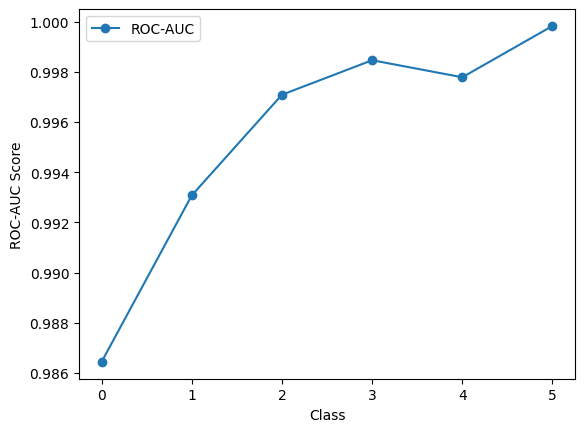

In [ ]:
roc_auc_scores = roc_auc_score(Y_test, resnet_prediction, average=None)

# Plot the ROC-AUC curve
plt.plot(np.arange(6), roc_auc_scores, 'o-', label='ROC-AUC')
plt.xlabel('Class')
plt.ylabel('ROC-AUC Score')
plt.xticks(np.arange(6))
plt.legend()
plt.show()

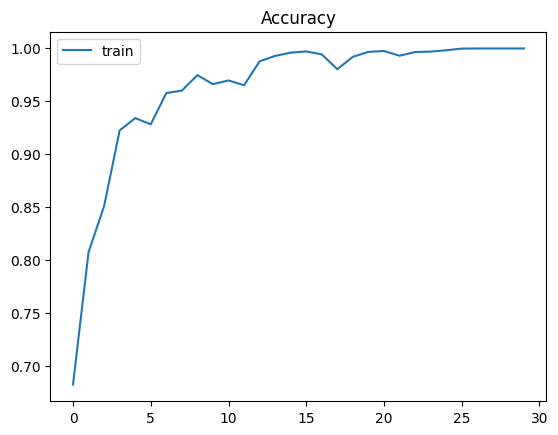

In [ ]:
import matplotlib.pyplot as pyplot
pyplot.title('Accuracy')
pyplot.plot(resnet_history.history['accuracy'], label='train')
pyplot.legend()
pyplot.show()

In [ ]:
vgg = VGG16(include_top=False, weights='imagenet', input_shape=(256,256,3))
vgg.summary()

58889256/58889256 [==============================] - 0s 0us/step
Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 256, 256, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 256, 256, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 256, 256, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 128, 128, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 128, 128, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 128, 128, 128)     147584    
                                                              

In [ ]:
for layer in vgg.layers:
    layer.trainable=False

In [ ]:
x = keras.layers.Flatten()(vgg.output)
x = keras.layers.Dense(32,activation='relu')(x)
x = keras.layers.Dense(64,activation='relu')(x)
x = keras.layers.Dense(128,activation='relu')(x)



prediction = keras.layers.Dense(6,activation='softmax')(x)
vgg_model = Model(inputs=vgg.input, outputs=prediction)
vgg_model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 256, 256, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 256, 256, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 256, 256, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 128, 128, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 128, 128, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 128, 128, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 64, 64, 128)       0   

In [ ]:
vgg_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
vgg_history= vgg_model.fit(X_train, Y_train, epochs = 30)


Epoch 1/30
224/224 [==============================] - 47s 179ms/step - loss: 0.9717 - accuracy: 0.6785
Epoch 2/30
224/224 [==============================] - 35s 156ms/step - loss: 0.4186 - accuracy: 0.8408
Epoch 3/30
224/224 [==============================] - 36s 159ms/step - loss: 0.2464 - accuracy: 0.9049
Epoch 4/30
224/224 [==============================] - 35s 157ms/step - loss: 0.1844 - accuracy: 0.9324
Epoch 5/30
224/224 [==============================] - 35s 157ms/step - loss: 0.0940 - accuracy: 0.9707
Epoch 6/30
224/224 [==============================] - 35s 157ms/step - loss: 0.1140 - accuracy: 0.9617
Epoch 7/30
224/224 [==============================] - 35s 158ms/step - loss: 0.1161 - accuracy: 0.9629
Epoch 8/30
224/224 [==============================] - 35s 158ms/step - loss: 0.0786 - accuracy: 0.9746
Epoch 9/30
224/224 [==============================] - 35s 158ms/step - loss: 0.1161 - accuracy: 0.9683
Epoch 10/30
224/224 [==============================] - 35s 158ms/step - l

In [ ]:
vgg_prediction= vgg_model.predict(X_test)

56/56 [==============================] - 13s 241ms/step


In [ ]:
for i in vgg_prediction:
  print(i)

NameError: ignored

In [ ]:
def prediction(img):
    img = cv2.resize(img, (256,256),interpolation= cv2.INTER_CUBIC)
    img = np.array(img)
    # reshaped_img = img.reshape(-1, 240, 240, 1)
    cv2.cvtColor(img,cv2.COLOR_GRAY2RGB)
    flattening = cnn.predict(reshaped_img).flatten()
    result = round(pd.Series(flattening))
    return result

In [ ]:
test_loss, test_accuracy = vgg_model.evaluate(X_test, Y_test)

56/56 [==============================] - 9s 155ms/step - loss: 0.4515 - accuracy: 0.9313


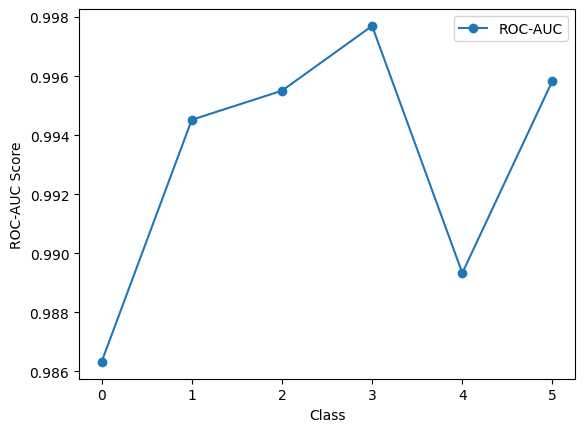

In [ ]:
roc_auc_scores = roc_auc_score(Y_test, vgg_prediction, average=None)

# Plot the ROC-AUC curve
plt.plot(np.arange(6), roc_auc_scores, 'o-', label='ROC-AUC')
plt.xlabel('Class')
plt.ylabel('ROC-AUC Score')
plt.xticks(np.arange(6))
plt.legend()
plt.show()

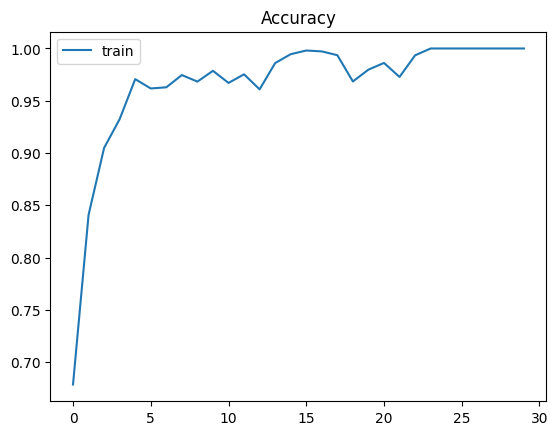

In [ ]:
pyplot.title('Accuracy')
pyplot.plot(vgg_history.history['accuracy'], label='train')
pyplot.legend()
pyplot.show()

In [ ]:
vgg_prediction

array([[6.1245487e-08, 6.6469295e-12, 9.9999988e-01, 3.8367708e-15,
        1.9457258e-13, 1.9125146e-10],
       [4.0421030e-03, 4.1577840e-07, 9.9595684e-01, 4.0643009e-09,
        2.6778088e-07, 3.0840206e-07],
       [1.0000000e+00, 7.4583485e-16, 2.0312663e-09, 7.4200557e-19,
        2.3391047e-14, 1.1576073e-14],
       ...,
       [6.7247677e-20, 1.1983655e-21, 1.6045943e-28, 6.2057884e-13,
        1.0000000e+00, 4.9326658e-28],
       [1.2706982e-08, 8.8471681e-19, 3.6743452e-14, 1.0000000e+00,
        3.4494577e-10, 3.0822250e-16],
       [9.9744010e-01, 3.2580053e-10, 2.5598723e-03, 2.3689012e-13,
        1.7286428e-08, 9.8344499e-10]], dtype=float32)

In [ ]:
cnn = keras.Sequential([
    keras.layers.Conv2D(filters=32, kernel_size=(2, 2), activation='relu', input_shape=(256, 256, 3)),
    keras.layers.MaxPooling2D((2,2)),

    keras.layers.Conv2D(filters=64, kernel_size=(2, 2), activation='relu'),
    keras.layers.MaxPooling2D((2, 2)),

    keras.layers.Conv2D(filters=128, kernel_size=(2, 2), activation='relu'),
    keras.layers.MaxPooling2D((2, 2)),

    keras.layers.Flatten(),
    keras.layers.Dense(6, activation='softmax')
])


In [ ]:
cnn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 255, 255, 32)      416       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 126, 126, 64)      8256      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 63, 63, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 62, 62, 128)       32896     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 31, 31, 128)      0

In [ ]:
cnn.compile (
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy'])

cnn_history= cnn.fit(X_train, Y_train, batch_size=4, epochs = 30)

Epoch 1/30
1791/1791 [==============================] - 27s 8ms/step - loss: 2.0797 - accuracy: 0.6072
Epoch 2/30
1791/1791 [==============================] - 15s 8ms/step - loss: 0.6264 - accuracy: 0.6831
Epoch 3/30
1791/1791 [==============================] - 15s 8ms/step - loss: 0.5368 - accuracy: 0.7435
Epoch 4/30
1791/1791 [==============================] - 15s 8ms/step - loss: 0.4642 - accuracy: 0.7803
Epoch 5/30
1791/1791 [==============================] - 15s 8ms/step - loss: 0.4124 - accuracy: 0.8085
Epoch 6/30
1791/1791 [==============================] - 15s 9ms/step - loss: 0.3699 - accuracy: 0.8347
Epoch 7/30
1791/1791 [==============================] - 15s 8ms/step - loss: 0.3070 - accuracy: 0.8643
Epoch 8/30
1791/1791 [==============================] - 15s 9ms/step - loss: 0.2591 - accuracy: 0.8877
Epoch 9/30
1791/1791 [==============================] - 15s 8ms/step - loss: 0.2357 - accuracy: 0.8989
Epoch 10/30
1791/1791 [==============================] - 15s 8ms/step - l

In [ ]:
test_loss, test_accuracy = cnn.evaluate(X_test, Y_test)

56/56 [==============================] - 1s 18ms/step - loss: 1.4306 - accuracy: 0.8297


In [ ]:
cnn_prediction= cnn.predict(X_test)

56/56 [==============================] - 1s 13ms/step


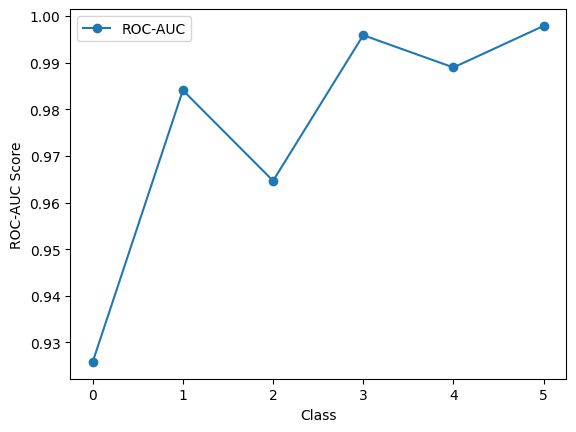

In [ ]:
roc_auc_scores = roc_auc_score(Y_test, cnn_prediction, average=None)

# Plot the ROC-AUC curve
plt.plot(np.arange(6), roc_auc_scores, 'o-', label='ROC-AUC')
plt.xlabel('Class')
plt.ylabel('ROC-AUC Score')
plt.xticks(np.arange(6))
plt.legend()
plt.show()

In [ ]:
!nvidia-smi

Sat May 13 06:57:57 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.85.12    Driver Version: 525.85.12    CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   63C    P8    11W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

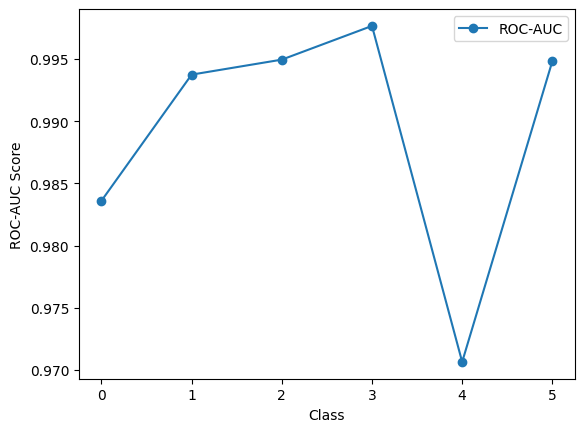

In [ ]:
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt


roc_auc_scores = roc_auc_score(Y_test, prediction, average=None)

# Plot the ROC-AUC curve
plt.plot(np.arange(6), roc_auc_scores, 'o-', label='ROC-AUC')
plt.xlabel('Class')
plt.ylabel('ROC-AUC Score')
plt.xticks(np.arange(6))
plt.legend()
plt.show()

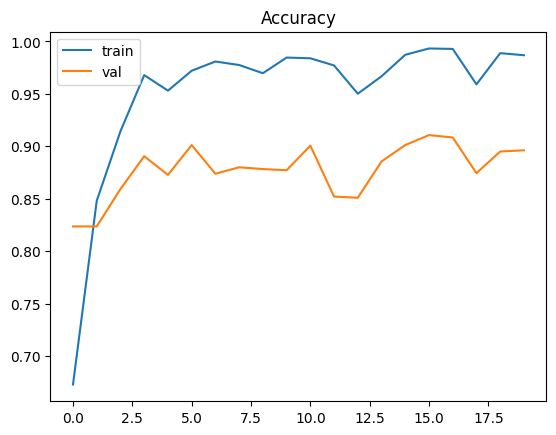

In [ ]:
import matplotlib.pyplot as pyplot
pyplot.title('Accuracy')
pyplot.plot(history.history['accuracy'], label='train')
pyplot.plot(history.history['val_accuracy'], label='val')
pyplot.legend()
pyplot.show()

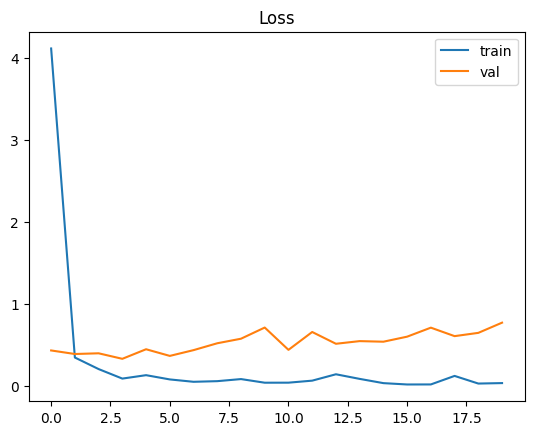

In [ ]:
pyplot.title('Loss')
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='val')
pyplot.legend()

In [ ]:
!pip install --quiet vit-keras
!pip install tensorflow-addons

  Preparing metadata (setup.py) ... done
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 591.0/591.0 kB 15.3 MB/s eta 0:00:00


In [ ]:
from vit_keras import vit

/usr/local/lib/python3.10/dist-packages/tensorflow_addons/utils/tfa_eol_msg.py:23: UserWarning: 

TensorFlow Addons (TFA) has ended development and introduction of new features.
TFA has entered a minimal maintenance and release mode until a planned end of life in May 2024.
Please modify downstream libraries to take dependencies from other repositories in our TensorFlow community (e.g. Keras, Keras-CV, and Keras-NLP). 

For more information see: https://github.com/tensorflow/addons/issues/2807 

  warnings.warn(


In [ ]:
vit_model = vit.vit_b32(
        image_size = 256,
        activation = 'softmax',
        pretrained = True,
        include_top = False,
        pretrained_top = False,
        classes = 6)
vit_model.summary()

353253686/353253686 [==============================] - 8s 0us/step


/usr/local/lib/python3.10/dist-packages/vit_keras/utils.py:81: UserWarning: Resizing position embeddings from 12, 12 to 8, 8
  warnings.warn(


Model: "vit-b32"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 256, 256, 3)]     0         
                                                                 
 embedding (Conv2D)          (None, 8, 8, 768)         2360064   
                                                                 
 reshape (Reshape)           (None, 64, 768)           0         
                                                                 
 class_token (ClassToken)    (None, 65, 768)           768       
                                                                 
 Transformer/posembed_input   (None, 65, 768)          49920     
 (AddPositionEmbs)                                               
                                                                 
 Transformer/encoderblock_0   ((None, 65, 768),        7087872   
 (TransformerBlock)           (None, 12, None, None))      

In [ ]:
x = keras.layers.Flatten()(vit_model.output)
x = keras.layers.Dense(32,activation='relu')(x)
x = keras.layers.Dense(64,activation='relu')(x)
x = keras.layers.Dense(128,activation='relu')(x)



prediction = keras.layers.Dense(6,activation='softmax')(x)
model = Model(inputs=vit_model.input, outputs=prediction)
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 256, 256, 3)]     0         
                                                                 
 embedding (Conv2D)          (None, 8, 8, 768)         2360064   
                                                                 
 reshape (Reshape)           (None, 64, 768)           0         
                                                                 
 class_token (ClassToken)    (None, 65, 768)           768       
                                                                 
 Transformer/posembed_input   (None, 65, 768)          49920     
 (AddPositionEmbs)                                               
                                                                 
 Transformer/encoderblock_0   ((None, 65, 768),        7087872   
 (TransformerBlock)           (None, 12, None, None))        